## Jialin Shi  --  Community and Crime Interpreter

###### Summary:
i. Data imputation and cleaning,    
ii.Plot a correlation matrix for the features in the data set.         
Make scatter plots and box plots.    
iii.Fit a linear model,a ridge regression model,    
a LASSO model(feature reduction),and a PCR model(feature projection).    
iv. Fit a L1 penalized gradient boosting tree    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import confusion_matrix          
from sklearn.metrics import f1_score                  
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

1-(a)

In [2]:
# prepare feature name
col_name=pd.read_excel('colName.xls',header=None)
col_name=col_name.values.ravel()

# load data
df=pd.read_csv('communities.data.csv',header=None)
df.columns=col_name
df.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20       0.06   
1          ...               0.02     0.12            0.45          ?   
2          ...               0.01     0.21            0.02          ?   
3          ...               0.02     0.39            0.28          ?   
4          ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32             0.14                  0.20  
1                 0.00                ?                  0.67  
2                 0.00                ?                  0.43  
3                 0.00                ?                  0.12  
4                 0.00                ?                  0.03  

[5 rows x 128 columns]

In [3]:
# drop non-predictors
df2 = df.iloc[:,5:]
df2_col=df2.columns
df2.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20       0.06   
1          ...               0.02     0.12            0.45          ?   
2          ...               0.01     0.21            0.02          ?   
3          ...               0.02     0.39            0.28          ?   
4          ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32             0.14                  0.20  
1                 0.00                ?                  0.67  
2                 0.00                ?                  0.43  
3                 0.00                ?                  0.12  
4                 0.00                ?                  0.03  

[5 rows x 123 columns]

1-(b)

In [4]:
# replace "?" with Null value
df2=df2.replace({'?':np.NaN})

# impute missing value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df2)       
SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='mean', verbose=0)
df2=pd.DataFrame(imp.transform(df2))        
df2.columns=df2_col
df2.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20   0.060000   
1          ...               0.02     0.12            0.45   0.163103   
2          ...               0.01     0.21            0.02   0.163103   
3          ...               0.02     0.39            0.28   0.163103   
4          ...               0.04     0.09            0.02   0.163103   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0       0.040000             0.900000             0.500000   
1       0.076708             0.698589             0.440439   
2       0.076708             0.698589             0.440439   
3       0.076708             0.698589             0.440439   
4       0.076708             0.698589             0.440439   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32         0.140000                  0.20  
1                 0.00         0.195078                  0.67  
2                 0.00         0.195078                  0.43  
3                 0.00         0.195078                  0.12  
4                 0.00         0.195078                  0.03  

[5 rows x 123 columns]

In [5]:
# add lable for train/test set
df2['set']=pd.Series()
df2['set'][0:1495]='train'
df2['set'][1495:]='test'
df2.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...    \
0         0.17         0.34         0.47         0.29        0.32  ...     
1         0.07         0.26         0.59         0.35        0.27  ...     
2         0.04         0.39         0.47         0.28        0.32  ...     
3         0.10         0.51         0.50         0.34        0.21  ...     
4         0.05         0.38         0.38         0.23        0.36  ...     

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20   0.060000       0.040000             0.900000   
1     0.12            0.45   0.163103       0.076708             0.698589   
2     0.21            0.02   0.163103       0.076708             0.698589   
3     0.39            0.28   0.163103       0.076708             0.698589   
4     0.09            0.02   0.163103       0.076708             0.698589   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0             0.500000                 0.32         0.140000   
1             0.440439                 0.00         0.195078   
2             0.440439                 0.00         0.195078   
3             0.440439                 0.00         0.195078   
4             0.440439                 0.00         0.195078   

   ViolentCrimesPerPop     set  
0                  0.20  train  
1                  0.67  train  
2                  0.43  train  
3                  0.12  train  
4                  0.03  train  

[5 rows x 124 columns]

1-(c) plot correlation

In [6]:
col_new=col_name.tolist()
col_new.append('set')

In [7]:
# concat 5 non-predictor back to data.
nonp=df.iloc[:,:5]
nonp.replace('?',np.NaN,inplace = True)
dt_full=pd.DataFrame(np.c_[nonp,df2])
dt_full.columns=col_new
dt_full.head()

state county community        communityname fold population householdsize  \
0     8    NaN       NaN         Lakewoodcity    1       0.19          0.33   
1    53    NaN       NaN          Tukwilacity    1          0          0.16   
2    24    NaN       NaN         Aberdeentown    1          0          0.42   
3    34      5     81440  Willingborotownship    1       0.04          0.77   
4    42     95      6096    Bethlehemtownship    1       0.01          0.55   

  racepctblack racePctWhite racePctAsian  ...   PopDens PctUsePubTrans  \
0         0.02          0.9         0.12  ...      0.26            0.2   
1         0.12         0.74         0.45  ...      0.12           0.45   
2         0.49         0.56         0.17  ...      0.21           0.02   
3            1         0.08         0.12  ...      0.39           0.28   
4         0.02         0.95         0.09  ...      0.09           0.02   

  PolicCars PolicOperBudg LemasPctPolicOnPatr LemasGangUnitDeploy  \
0      0.06          0.04                 0.9                 0.5   
1  0.163103     0.0767085            0.698589            0.440439   
2  0.163103     0.0767085            0.698589            0.440439   
3  0.163103     0.0767085            0.698589            0.440439   
4  0.163103     0.0767085            0.698589            0.440439   

  LemasPctOfficDrugUn PolicBudgPerPop ViolentCrimesPerPop     set  
0                0.32            0.14                  0.2  train  
1                   0        0.195078                 0.67  train  
2                   0        0.195078                 0.43  train  
3                   0        0.195078                 0.12  train  
4                   0        0.195078                 0.03  train  

[5 rows x 129 columns]

In [8]:
corr = df2.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_properties(**{'font-size': '1pt'})

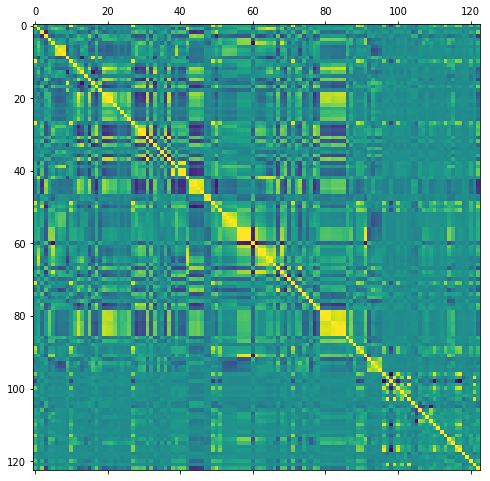

In [9]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (8, 8)
plt.matshow(df2.corr())
plt.show()

1-(d)

In [10]:
t=df2.describe()
std_squared=(t.iloc[2,:].values)
mean=(t.iloc[1,:].values)
df_cv = std_squared/mean
df_cv

array([2.20350254, 0.3532983 , 1.4109204 , 0.32378156, 1.35916219,
       1.61427779, 0.36583987, 0.29069289, 0.49516051, 0.42344171,
       2.00174364, 0.63884887, 0.57975339, 0.32771006, 0.70003012,
       0.35923995, 0.36851263, 0.6990305 , 0.34963908, 0.52773189,
       0.54563343, 0.50755219, 0.589469  , 0.80968509, 0.60619385,
       0.67064457, 0.47395972, 2.30496971, 0.75398017, 0.67560022,
       0.52828627, 0.57840084, 0.5561328 , 0.34732725, 0.51058034,
       0.39822568, 0.50846131, 0.42210586, 0.39558337, 0.40381162,
       0.3592727 , 0.37146815, 0.31695475, 0.33061114, 0.33247588,
       0.32942584, 0.32855095, 0.33624845, 0.33272212, 2.99419645,
       0.91980289, 2.90049716, 0.68420109, 0.58489027, 0.50490986,
       0.45566604, 1.3001003 , 1.29763181, 1.28123297, 1.28403377,
       0.28867317, 1.4590666 , 0.73453473, 0.75710873, 0.36691384,
       0.31940729, 0.46845379, 0.35031616, 1.12719959, 0.34837064,
       0.81088779, 1.95877973, 0.26964697, 0.33754097, 1.06474

1-(e)

In [11]:
# festure numbers
128**(1/2)

11.313708498984761

In [12]:
# calculate cv and sort in descending.
df_cv=pd.DataFrame(df_cv)
df_cv.index = df2_col
df_cv=df_cv.sort_index(by=0,ascending=False)
df_cv.iloc[0:11,:]


0
NumStreet            4.407702
NumInShelters        3.485481
NumIlleg             2.994196
NumImmig             2.900497
LemasPctOfficDrugUn  2.555266
NumUnderPov          2.304970
population           2.203503
numbUrban            2.001744
HousVacant           1.958780
LandArea             1.678031
racePctHisp          1.614278

In [13]:
cv_11=df_cv.iloc[0:11,:].index.tolist()
cv_11

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

In [14]:
# top 11 cv features-dataframe
df_11 = df2[cv_11]
df_11.head()

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05

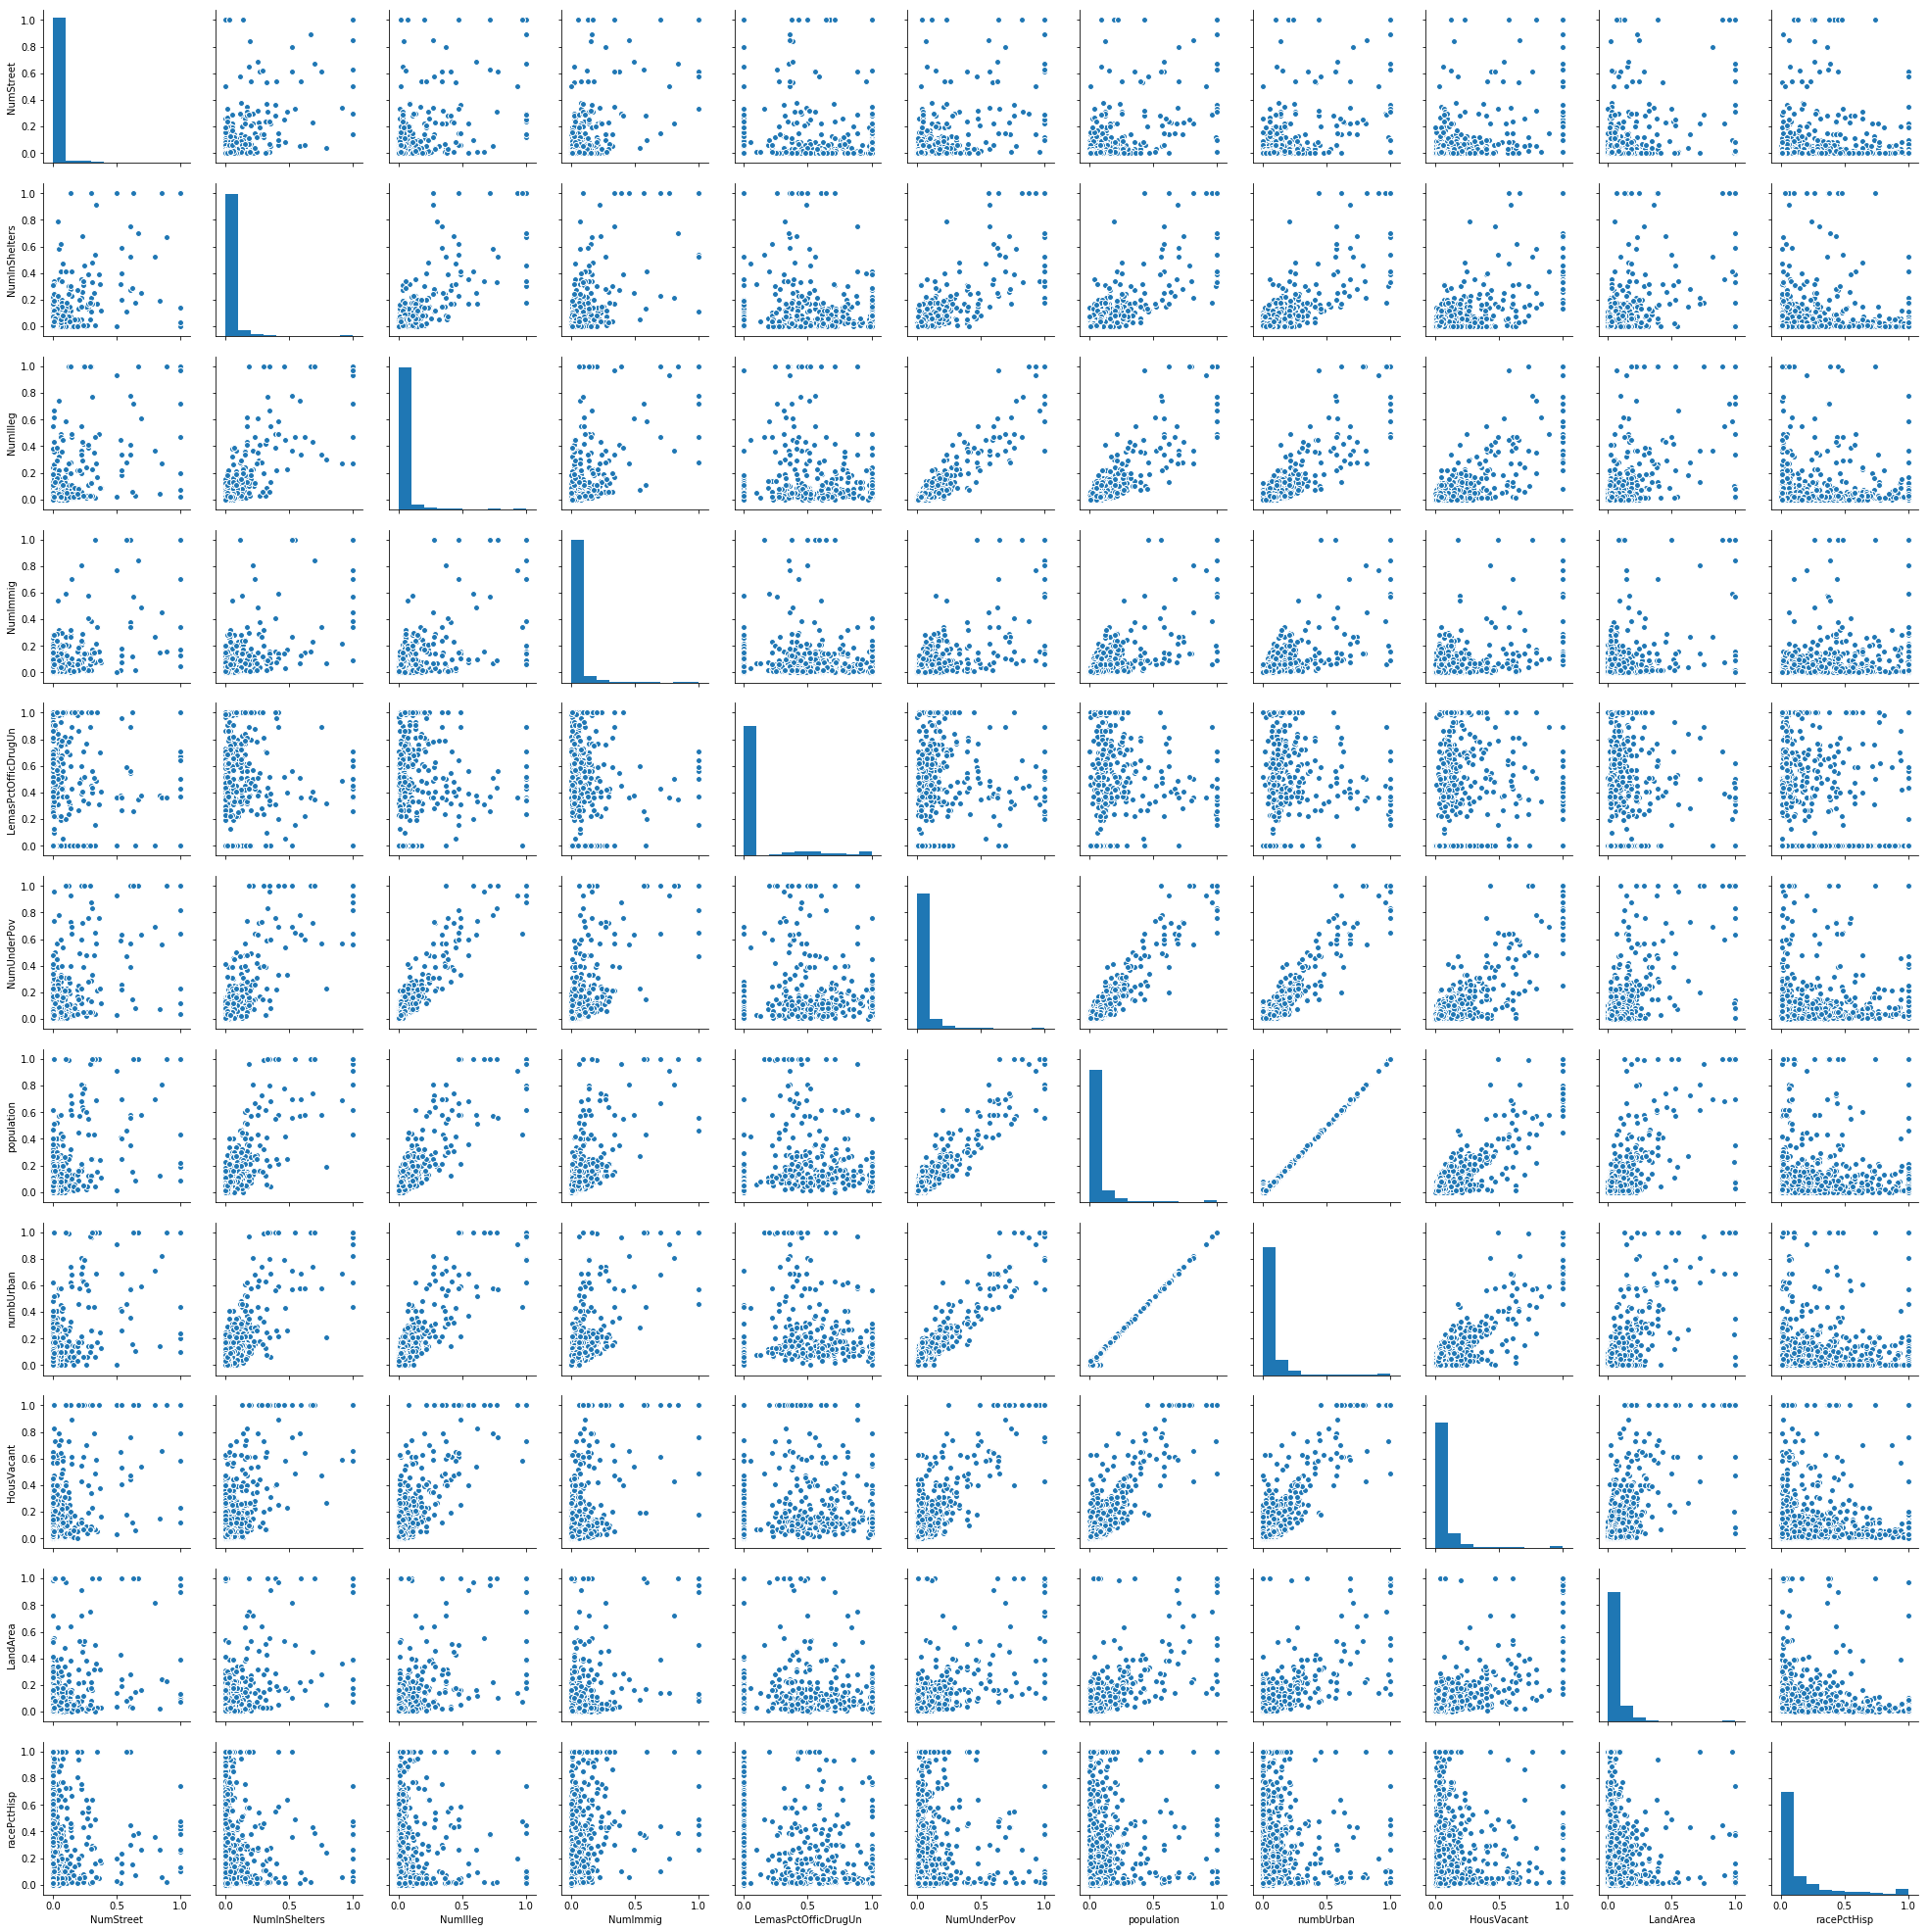

In [15]:
sns.pairplot(df_11)
plt.show()

#### 1-(e) not very obvious except population and numUrban has a linear relationship.


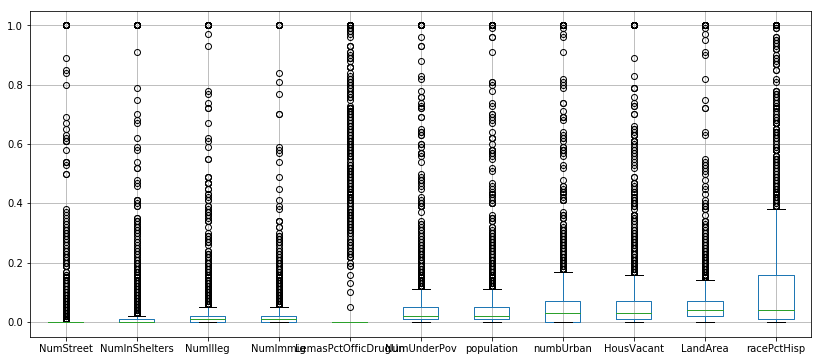

In [16]:
plt.figure(figsize=[14,6])
df_11.boxplot()
plt.show()

1-(f)

In [17]:
# split train and test
f_train=df2[df2['set']=='train']
f_test=df2[df2['set']=='test']

In [18]:
# build a linear model
X = f_train.iloc[:,:-2]
Y = f_train.iloc[:,-2]
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     ViolentCrimesPerPop    R-squared:                       0.712
Model:                              OLS   Adj. R-squared:                  0.686
Method:                   Least Squares   F-statistic:                     27.78
Date:                  Fri, 12 Apr 2019   Prob (F-statistic):          6.88e-291
Time:                          00:28:49   Log-Likelihood:                 957.23
No. Observations:                  1495   AIC:                            -1668.
Df Residuals:                      1372   BIC:                            -1015.
Df Model:                           122                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [19]:
from sklearn.metrics import mean_squared_error
# MSE.test 
Xt = f_test.iloc[:,:-2]
Yt = f_test.iloc[:,-2]
Xt2 = sm.add_constant(Xt)
pred=est2.predict(Xt2)
MSEtest= mean_squared_error(Yt,pred)
MSEtest

0.7897255273852613

#### 1-(f)  for linear model, test MSE=0.7897

1-(g)

In [20]:
# RidgeCV
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=5)
model.fit(X, Y)
y_pred=model.predict(Xt)
MSE= mean_squared_error(Yt,y_pred)
MSE

0.017737081104303696

#### 1-(g) for Ridge Regression, test mse=0.0177

1-（h）

In [21]:
# LassoCV
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X, Y)
pred=lasso.predict(Xt) 
MSE= mean_squared_error(Yt,pred)
MSE

0.017763310017858247

In [22]:
# list of the selected features
ind=np.array(np.where(lasso.coef_!=0))[0]
X.columns[ind]

Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStr

#### 1-(h) for Lasso, test mse =0.01776
and the list is: 
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
       'PctBornSameState', 'PctSameCity85', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'PctPolicBlack', 'PctPolicAsian', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn', 'PolicBudgPerPop']

In [23]:
## standardize
from sklearn import preprocessing
from sklearn.preprocessing import scale
Xs=scale(X)
Xts=scale(Xt)
# LassoCV
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(Xs, Y)
pred=lasso.predict(Xts) 
MSE= mean_squared_error(Yt,pred)
MSE

0.017998418592939724

#### 1-(h) before scaling, test mse =0.01776 ;  after scaling, test mse=0.01799
#### after scaling test mse rises.

1-(i)

best_i is: 96 mse is: 0.019321939832403674


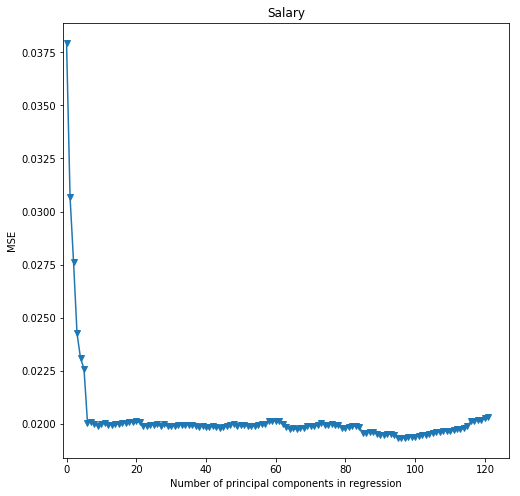

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics 
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression

pca = PCA()
X_reduced=pca.fit_transform(X)
n=len(X_reduced)

# 10-fold CV, with shuffle
kf_5=model_selection.KFold(n_splits=5,shuffle=True, random_state=1)
regr = LinearRegression()
mse=[]
best_mse=10000
best_i=-1

# Calculate MSE using CV for the 122 principle components, adding one component at the time.
for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], Y.ravel(), cv=kf_5, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if best_mse>mse[-1]:
        best_mse=mse[-1]
        best_i=i
        best_X=X_reduced[:,:i]
        
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

print('best_i is:',best_i, "mse is:", best_mse)

#### 1-(i) best_i =96, and mse = 0.0193

1-(j)

In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [26]:
# transform data format for xgboost
data_dmatrix = xgb.DMatrix(data=X,label=Y)
alpha=[1e-5,1e-4,1e-3,1e-2,1,5,10,20]
cv=[]
best_i=-1
mse0=1000
for i in alpha:
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': i}
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                        num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
    result_summary=cv_results.describe().iloc[1,2]
    cv.append(result_summary)
    if mse0>cv[-1]:
        mse0=cv[-1]
        best_i=i
        

[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_

[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_

[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_

[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_

[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_

[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_

[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_

[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_

[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_

[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_

[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[00:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_

[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_

In [27]:
cv

[0.16545099600000002,
 0.17389916756756757,
 0.16525433199999998,
 0.16478201599999998,
 0.166099608,
 0.17072914400000003,
 0.17461418000000006,
 0.18455447200000002]

In [28]:
print('best aplha is:', best_i, ' with best mse :', mse0)

best aplha is: 0.01  with best mse : 0.16478201599999998


#### 1-(j) best aplha is: 0.01  with best mse : 0.16478